# CPSC 330 Lecture 1

Instructor: Mike Gelbart

Outline:

- Using Zoom (5 min)
- About this course (20 min)
- Python requirements/resources (10 min)
- Survey + Break (15 min)
- Introducing our first dataset (5 min)
- Introduction to supervised learning (10 min)
- `DummyClassifier` (5 min)
- Activity (15 min)

In [3]:
import pandas as pd
from sklearn.dummy import DummyClassifier

## Using Zoom while someone is screensharing (5 min)

- When someone is screensharing, Zoom automatically puts you into full screen.
- This is annoying most of the time, and I suggest you disable this in settings.
- However, for this course you can go into full screen because I will explicity leave you space on the right side. 
- Please mark "yes" in the Participants box to confirm that you have the set up done correctly.

## About this course (20 min)

#### Most important link

https://github.com/UBC-CS/cpsc330

Please read everything on there!

**Syllabus quiz** available on Canvas, due Friday at 11:59pm.

#### CPSC 330 vs. 340

https://github.com/UBC-CS/cpsc330/blob/master/docs/330_vs_340.md

TLDR:

- CPSC 340 has many prerequisites 
- CPSC 340 goes deeper but has a more narrow scope
- I think CPSC 330 will be more useful if you just plan to apply basic ML

#### Registration, waitlist and prerequisites

https://github.com/UBC-CS/cpsc330/blob/master/docs/course_info.md#registration

Please do not contact me about these issues before reading everything in this document. Even then, I am very unlikely to be able to help with registration, waitlist or prerequisite issues.

#### Course format

- Weekly assignments due Mondays at 6pm.
- First assignment due **this coming Monday**, Sep 14th, at 6pm (you should have hw repos already).
- You must do the first assignment on your own.
- I'm hoping you'll be able to work in partners on subsequent assignments - pending the technology side of things.
- Weekly tutorials (optional) run by the TAs.
- One midterm, one final (I'm thinking of a "take-home" format).

#### Code of conduct

- Our main forum for getting help will be [Piazza](https://piazza.com/class/kb2e6nwu3uj23).
- Please read the entire [document about asking for help](https://github.com/UBC-CS/cpsc330/blob/master/docs/asking_for_help.md).

TLDR: be nice.

#### Grades

The grading breakdown is [here](https://github.com/UBC-CS/cpsc330/blob/master/docs/course_info.md#grading). The policy on challenging grades is [here](https://github.com/UBC-CS/cpsc330/blob/master/docs/grades.md).

#### Course tools: Python, git, GitHub

- Instructions on course page for [Python](https://github.com/UBC-CS/cpsc330/blob/master/docs/python_info.md) and [git](https://github.com/UBC-CS/cpsc330/blob/master/docs/git_installation.md).

#### Lecture and homework format: Jupyter notebooks

- This document is a [Jupyter notebook](https://jupyter.org/), with file extension `.ipynb`.
- Jupyter notebooks are edited with one of two web apps: Jupyter notebook (older) or Jupyter lab (newer).
  - The Python install instructions (above) suggest installing Anaconda, which should include these applications.
  - I am using Jupyter lab, some things might not work with the Jupyter notebook application.
- Jupyter notebooks contain a mix of code, code output, markdown-formatted text (including LaTeX equations), and more.
- When you open a Jupyter notebook in one of these apps, the document is "live", meaning you can run the code.
- For example:

In [4]:
1+1

2

In [5]:
x = [1,2,3]
x[0] = 9999
x

[9999, 2, 3]

- By default, Jupyter prints out the result of the last line of code, so you don't need as many `print` statements.
- In addition to the "live" notebooks, Jupyter notebooks can be statically rendered in the web browser, e.g. [this](https://github.com/UBC-CS/cpsc330/blob/master/lectures/01_intro.ipynb).
  - This can be convenient for quick read-only access, without needing to launch the Jupyter notebook/lab application.
  - But you need to launch the app properly to interact with the notebooks.



#### Lecture style

- Lots of live coding in Jupyter.
- All materials will be posted, no need to photograph anything.

#### About me

- PhD in machine learning, have been teaching at UBC since then (no more research).
- Doing some consulting for startups and for a venture capital fund.
- Part of the team that created the UBC Master of Data Science (MDS), Co-Director of MDS since 2018.
- Have taught CPSC 340 several times.
- Designed this course, this is my second time teaching it.
- Please call me Mike!

## Python requirements/resources (10 min)

#### Python knowledge you'll need

- Basic Python programming
- Numpy
- Pandas
- Matplotlib
- Sparse matrices


#### Python resources

- We do not have time to teach all the Python we need.
- Some of you will already know Python, others won't.
- Homework 1 is all about Python.

https://github.com/UBC-CS/cpsc330/blob/master/docs/resources.md

## Survey + Break (15 min)

- We will try to take a 5-minute break half way through every class.
- Today, we'll take a longer break because there are two surveys to complete.
- Please complete the anonymous entry survey on Qualtrics [here](https://ubc.ca1.qualtrics.com/jfe/form/SV_6RI7xxxTSlWqeXP).
- Also, please complete the anonymous cilantro survey on Qualtrics [here](https://ubc.ca1.qualtrics.com/jfe/form/SV_43egGadpsmKxUuV).
  - We wil be analyzing these data set next week in class!!
- Click "Yes" in the participants box when you are done both surveys.

## Introducing our first data set (5 min)

- This dataset contains longtitude and latitude data for 400 cities in the US
- Each city is labelled as `red` or `blue` depending on how they voted in the 2012 election.
- The cities data was sampled from (http://simplemaps.com/static/demos/resources/us-cities/cities.csv). The election information was collected from Wikipedia.

This dataset contains votes (red or blue) for various cities (?) in some past U.S. election.

In [6]:
df = pd.read_csv('data/cities_USA.csv', index_col=0)
df

,lon,lat,vote
1,-80.162475,25.692104,blue
2,-80.214360,25.944083,blue
3,-80.094133,26.234314,blue
4,-80.248086,26.291902,blue
5,-81.789963,26.348035,blue
...,...,...,...
396,-97.460476,48.225094,red
397,-96.551116,48.591592,blue
398,-166.519855,53.887114,red
399,-163.733617,67.665859,red


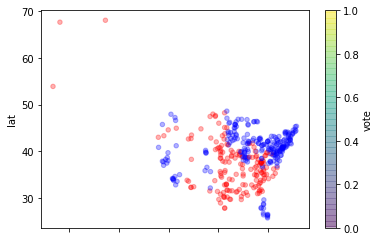

In [7]:
df.plot.scatter(x="lon", y="lat", c="vote", alpha=0.3);

## Introduction to supervised learning (10 min)

- In supervised learning, we have a set of features, $X$, with associated targets, $y$
- We wish to find a model function that relates $X$ to $y$
- Then use that model function to predict future observations.

What are $X$ and $y$ here?

In [8]:
X = df[["lon", "lat"]]
X

,lon,lat
1,-80.162475,25.692104
2,-80.214360,25.944083
3,-80.094133,26.234314
4,-80.248086,26.291902
5,-81.789963,26.348035
...,...,...
396,-97.460476,48.225094
397,-96.551116,48.591592
398,-166.519855,53.887114
399,-163.733617,67.665859


In [9]:
y = df["vote"]
y

1      blue
2      blue
3      blue
4      blue
5      blue
       ... 
396     red
397    blue
398     red
399     red
400     red
Name: vote, Length: 400, dtype: object

- Note that $X$ is a 2-dimensional array, whereas $y$ is 1-dimensional.

In [10]:
X.shape

(400, 2)

In [11]:
X.ndim

2

In [12]:
y.shape

(400,)

In [13]:
y.ndim

1

#### Classification vs Regression
- Variables can be characterized as quantitative/numeric or qualitative/categorical
- **Classification** = prediction of a categorical target (e.g. red vs. blue)
- **Regression** = prediction of a quantitative target (coming later in this course)

<img src='img/regr.png' width="750">

There is also _unsupervised learning_, which we'll talk about (very briefly) later in the course.

- For ML we typically work with "tabular data".
- Rows are examples.
- Columns are features (the last column is typically the target).

### Terminology
- You will see a lot of variable terminology in machine learning and statistics
- See the MDS terminology resource [here](https://ubc-mds.github.io/resources_pages/terminology/).

Of particular note:

- **examples** = rows = samples = records = instances (usually denoted by $n$)
- **features** = inputs = predictors = explanatory variables = regressors = independent variables = covariates (usually denoted by $d$)
- **targets** = outputs = outcomes = response variable = dependent variable = labels (if categorical).
- **training** = learning = fitting

## `DummyClassifier` (5 min)

- Rule of thumb: start simple.
- Simplest classifier: [`DummyClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html).

In [14]:
# df = pd.read_csv('data/cities_USA.csv', index_col=0)
# X = df.drop(columns=['vote'])
# y = df['vote']
# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     test_size=0.5,
#                                                     random_state=123)

In [15]:
from sklearn.dummy import DummyClassifier

In [16]:
dc = DummyClassifier(strategy="prior")
dc.fit(X, y);

In [19]:
dc.score(X, y)

0.585

- What is this doing?
- Just picking the most popular class:

In [20]:
y.value_counts()

blue    234
red     166
Name: vote, dtype: int64

In [22]:
y.value_counts()/len(y)

blue    0.585
red     0.415
Name: vote, dtype: float64

Blue is more common, so just predict blue everywhere:

In [23]:
dc.predict(X)

array(['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
      

## TODO

talk about fit/predict

## True/False questions (15 min)

1. about dummyclassifier and fit/predict